In [1]:
import numpy as np 
import pandas as pd 
from scipy import linalg



In [2]:
two_composite_filtered = pd.read_csv("../Curated_data/cluster_0_data.csv", low_memory=False)

In [3]:
len(two_composite_filtered)

81202

In [3]:
two_composite_filtered['Name'].nunique()

622

In [4]:
for col in two_composite_filtered:
    print(col)

Sample Number
Name
Depth From
Depth To
X
Y
Z
Length
Alt1_Code
Alt1_Int
Alt1_Style
Alt2_Code
Alt2_Int
Alt2_Style
Au_ppb
Comments
Core_Angle
Core_Diameter
CoreLoss_m
Cumulate
DataSet
Date_Logged
Density
Density_gcm3
Density_kgm3
Dest
Gamma_uRh
Gangue_Min
Interval_Length
Ir_ppb
Ja
Jn
Jr
Lith1_Code
Logged_By
Min1_Code
Min1_Pct
Min1_Style
Min2_Code
Min2_Pct
Min2_Style
Min3_Code
Min3_Pct
Min3_Style
Ore_Type
Ori_Confidence
Orig_Lith
Os_ppb
Pd_ppb
Proportion (Alt1_Code)
Proportion (Alt1_Int)
Proportion (Alt1_Style)
Proportion (Alt2_Code)
Proportion (Alt2_Int)
Proportion (Alt2_Style)
Proportion (Comments)
Proportion (DataSet)
Proportion (Date_Logged)
Proportion (Gangue_Min)
Proportion (Lith1_Code)
Proportion (Logged_By)
Proportion (Min1_Code)
Proportion (Min1_Style)
Proportion (Min2_Code)
Proportion (Min2_Style)
Proportion (Min3_Code)
Proportion (Min3_Style)
Proportion (Ore_Type)
Proportion (Ori_Confidence)
Proportion (Orig_Lith)
Proportion (samp_id)
Proportion (SampleID)
Proportion (Sulph1_Cod

In [5]:
two_composite_filtered['Sulph1_Code'].value_counts()

Sulph1_Code
PO    24673
SU    11405
PY      827
CP      678
MT       30
Name: count, dtype: int64

In [6]:
len(two_composite_filtered)

81202

In [7]:
two_composite_filtered['Sulph3_Code'].value_counts()

Sulph3_Code
PY    512
CP    148
PO     64
MT     53
PE     23
Name: count, dtype: int64

In [8]:
non_na_values = two_composite_filtered['Sulph2_Pct'].notna()
filtered_df = two_composite_filtered[non_na_values]
len(filtered_df['Sulph2_Pct'])

10546

In [9]:
two_composite_filtered['Sulph1_Code'].value_counts()

Sulph1_Code
PO    24673
SU    11405
PY      827
CP      678
MT       30
Name: count, dtype: int64

In [10]:
two_composite_filtered['Sulph2_Code'].value_counts()

Sulph2_Code
CP    16629
PO      920
PY      235
MT        3
PE        2
Name: count, dtype: int64

In [11]:
two_composite_filtered['Sulph2_Code'].value_counts()

Sulph2_Code
CP    16629
PO      920
PY      235
MT        3
PE        2
Name: count, dtype: int64

In [12]:
for column in two_composite_filtered:
    print(column)

Sample Number
Name
Depth From
Depth To
X
Y
Z
Length
Alt1_Code
Alt1_Int
Alt1_Style
Alt2_Code
Alt2_Int
Alt2_Style
Au_ppb
Comments
Core_Angle
Core_Diameter
CoreLoss_m
Cumulate
DataSet
Date_Logged
Density
Density_gcm3
Density_kgm3
Dest
Gamma_uRh
Gangue_Min
Interval_Length
Ir_ppb
Ja
Jn
Jr
Lith1_Code
Logged_By
Min1_Code
Min1_Pct
Min1_Style
Min2_Code
Min2_Pct
Min2_Style
Min3_Code
Min3_Pct
Min3_Style
Ore_Type
Ori_Confidence
Orig_Lith
Os_ppb
Pd_ppb
Proportion (Alt1_Code)
Proportion (Alt1_Int)
Proportion (Alt1_Style)
Proportion (Alt2_Code)
Proportion (Alt2_Int)
Proportion (Alt2_Style)
Proportion (Comments)
Proportion (DataSet)
Proportion (Date_Logged)
Proportion (Gangue_Min)
Proportion (Lith1_Code)
Proportion (Logged_By)
Proportion (Min1_Code)
Proportion (Min1_Style)
Proportion (Min2_Code)
Proportion (Min2_Style)
Proportion (Min3_Code)
Proportion (Min3_Style)
Proportion (Ore_Type)
Proportion (Ori_Confidence)
Proportion (Orig_Lith)
Proportion (samp_id)
Proportion (SampleID)
Proportion (Sulph1_Cod

# 1. Mineralogy

In [13]:
mineral_columns = two_composite_filtered.iloc[:, list(range(4, 7)) + list(range(35, 44))]
mineral_columns

,X,Y,Z,Min1_Code,Min1_Pct,Min1_Style,Min2_Code,Min2_Pct,Min2_Style,Min3_Code,Min3_Pct,Min3_Style
0,3498947.63,7511204.97,236.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3498948.84,7511204.92,234.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3498950.05,7511204.87,233.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3498951.26,7511204.82,231.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3498952.47,7511204.77,230.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
81197,3499086.36,7510950.00,89.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81198,3499087.71,7510950.00,88.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81199,3499089.07,7510950.00,86.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81200,3499090.42,7510950.00,85.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Iterate through columns in mineral_columns and display non-NaN values
for column in mineral_columns.columns:
    non_na_values = mineral_columns[column].dropna()
    if not non_na_values.empty:
        print(f"Column: {column}")
        print(non_na_values.head())
        print()


Column: X
0    3498947.63
1    3498948.84
2    3498950.05
3    3498951.26
4    3498952.47
Name: X, dtype: float64

Column: Y
0    7511204.97
1    7511204.92
2    7511204.87
3    7511204.82
4    7511204.77
Name: Y, dtype: float64

Column: Z
0    236.38
1    234.79
2    233.20
3    231.61
4    230.01
Name: Z, dtype: float64

Column: Min1_Code
400    OP
401    OP
402    OP
415    OP
416    OP
Name: Min1_Code, dtype: object

Column: Min1_Pct
2348    10.0
2349    10.0
2350    10.0
2351    10.0
2352    10.0
Name: Min1_Pct, dtype: float64

Column: Min1_Style
1627    di>ve
1628       pa
1629       pa
1630       di
1631       di
Name: Min1_Style, dtype: object

Column: Min2_Code
1355    OP
1356    OP
1357    OP
1359    OP
1360    OP
Name: Min2_Code, dtype: object

Column: Min2_Pct
2348    17.0
2349    17.0
2350    17.0
2351    17.0
2352    17.0
Name: Min2_Pct, dtype: float64

Column: Min2_Style
1627    di>ve
1628       pa
1629       pa
1633       pa
1634       pa
Name: Min2_Style, dtype: object

In [15]:

# Create a boolean mask to check if X, Y, and Z are not NA
xyz_not_na = two_composite_filtered[['X', 'Y', 'Z']].notna().all(axis=1)

# Create a boolean mask to check if at least one of the other columns is not NA
other_not_na = mineral_columns.iloc[:, 3:].notna().any(axis=1)

# Combine the two masks to filter rows where X, Y, Z are not NA and at least one other column is not NA
filtered_data = mineral_columns[xyz_not_na & other_not_na]

# Now, 'filtered_data' contains the rows where X, Y, and Z are not NA, and at least one of the other columns is not NA


In [16]:
clustered_data = pd.read_csv("../Curated_data/cluster_0_data.csv", low_memory=False)
x1 = clustered_data['X']
y1 = clustered_data['Y']

C:\Users\flea0265\AppData\Local\Temp\ipykernel_16152\1492081968.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(selected_variables))
C:\Users\flea0265\AppData\Local\Temp\ipykernel_16152\1492081968.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, label=variable)


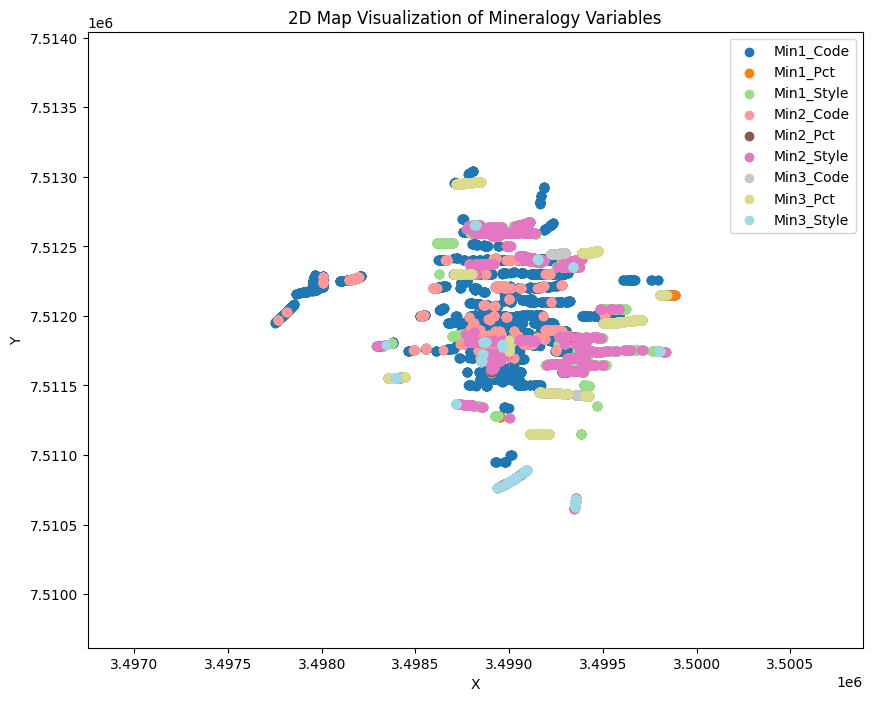

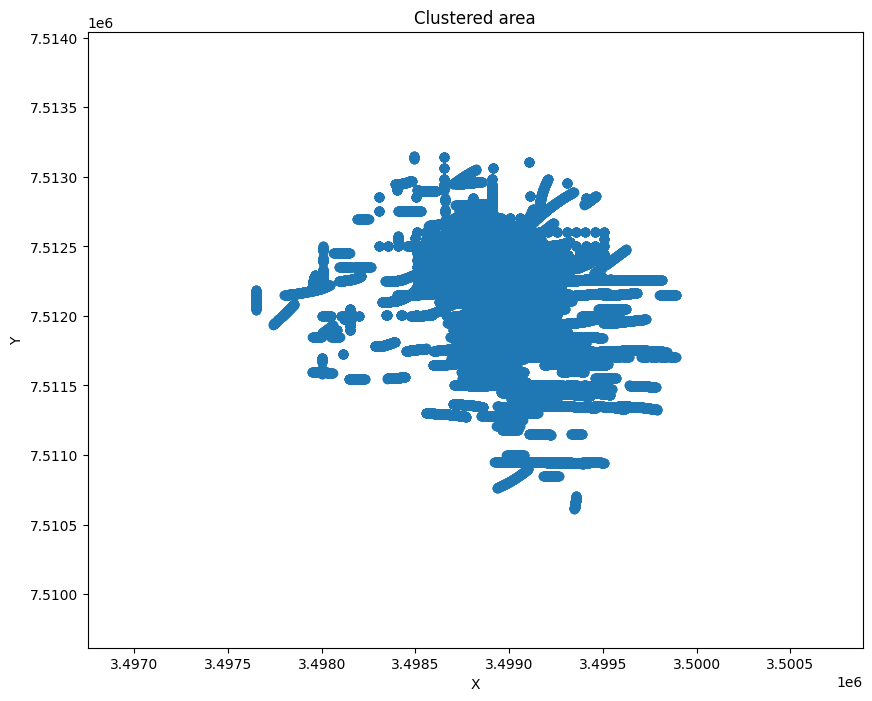

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_data' contains the filtered data where X, Y, and Z are not NA, and at least one other column is not NA
# 'mineral_columns' contains the relevant data with columns 5 to 7 and 56 to 65
# Determine the widest range among all variables

# Define the variables you want to visualize (e.g., columns 3 onwards)
selected_variables = mineral_columns.columns[3:]

# Create a color map with a unique color for each variable
cmap = plt.cm.get_cmap('tab20', len(selected_variables))

# Create a scatter plot for each variable with a unique color
plt.figure(figsize=(10, 8))

for i, variable in enumerate(selected_variables):
    non_na_mask = filtered_data[variable].notna()
    x = filtered_data['X'][non_na_mask]
    y = filtered_data['Y'][non_na_mask]
    values = filtered_data[variable][non_na_mask]
    
    # Use a unique color for each variable based on the color map
    color = cmap(i)
    
    plt.scatter(x, y, c=color, label=variable)

margin = 1000
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Map Visualization of Mineralogy Variables')
# Set the X and Y axis limits with a margin
x_min = filtered_data['X'].min() - margin
x_max = filtered_data['X'].max() + margin
y_min = filtered_data['Y'].min() - margin
y_max = filtered_data['Y'].max() + margin

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(x1, y1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustered area')
plt.show()


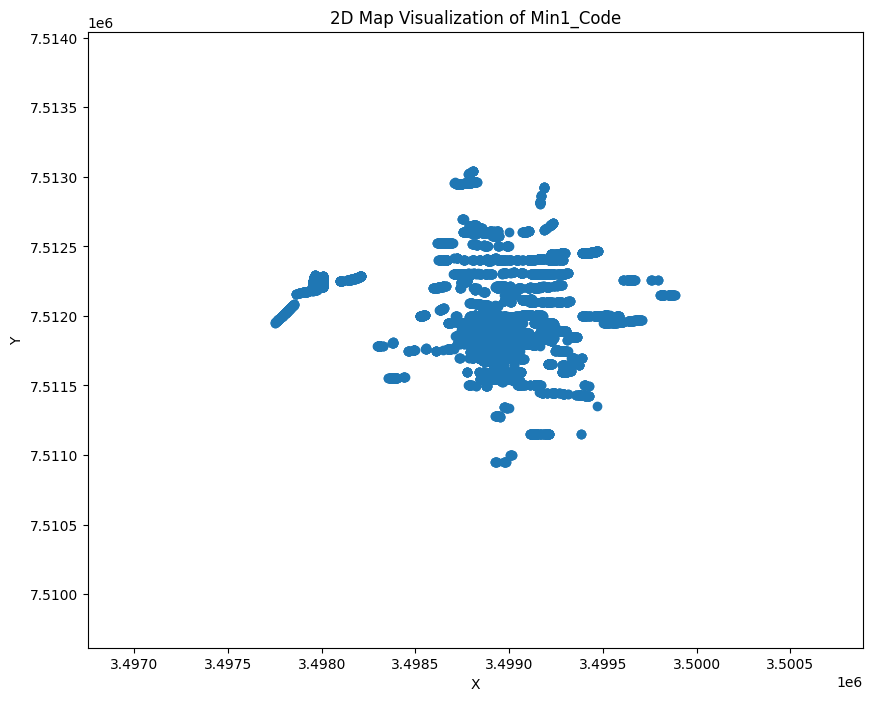

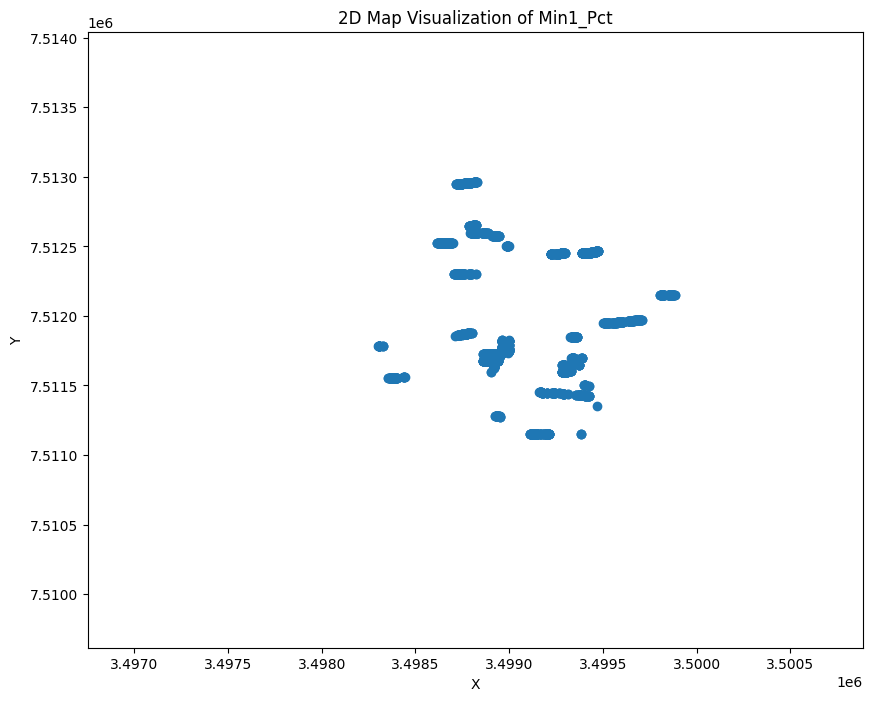

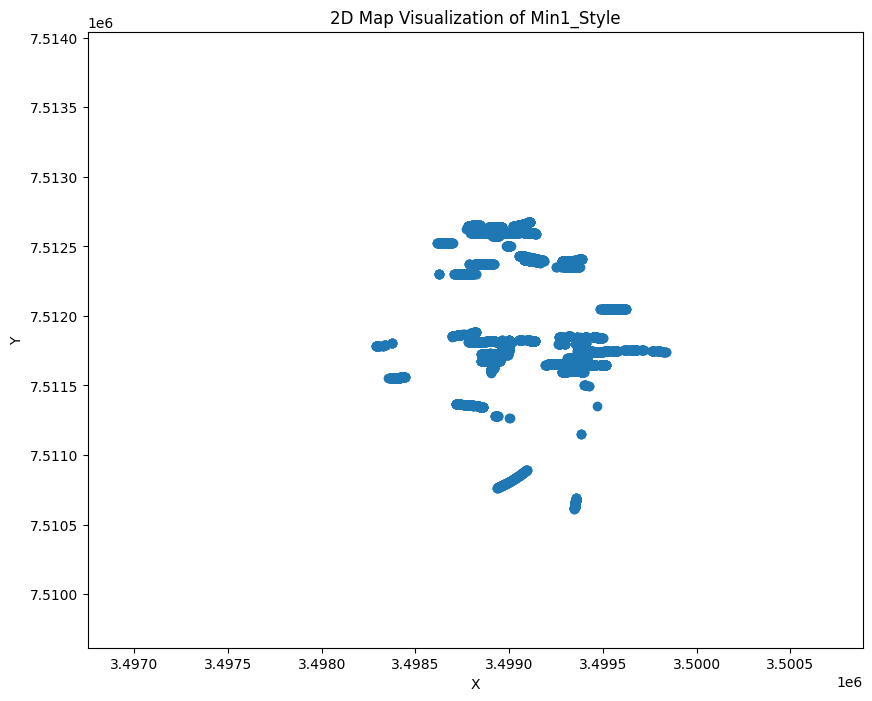

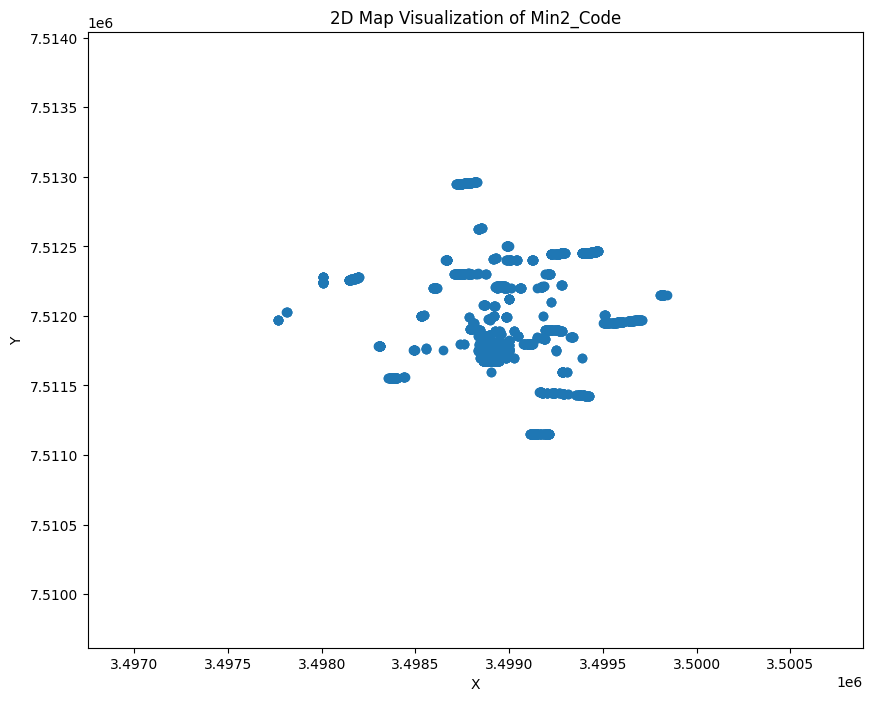

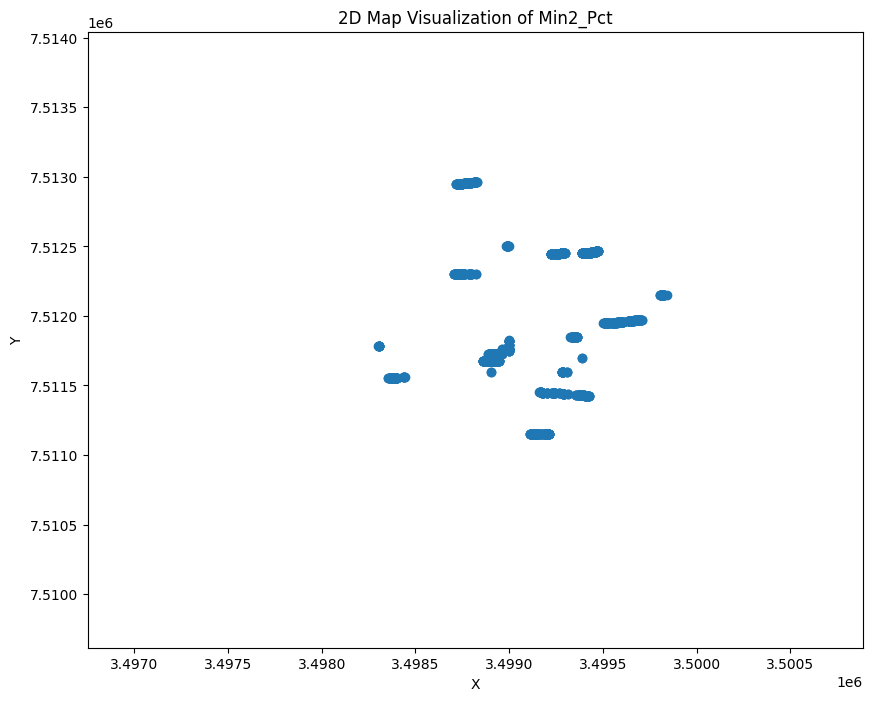

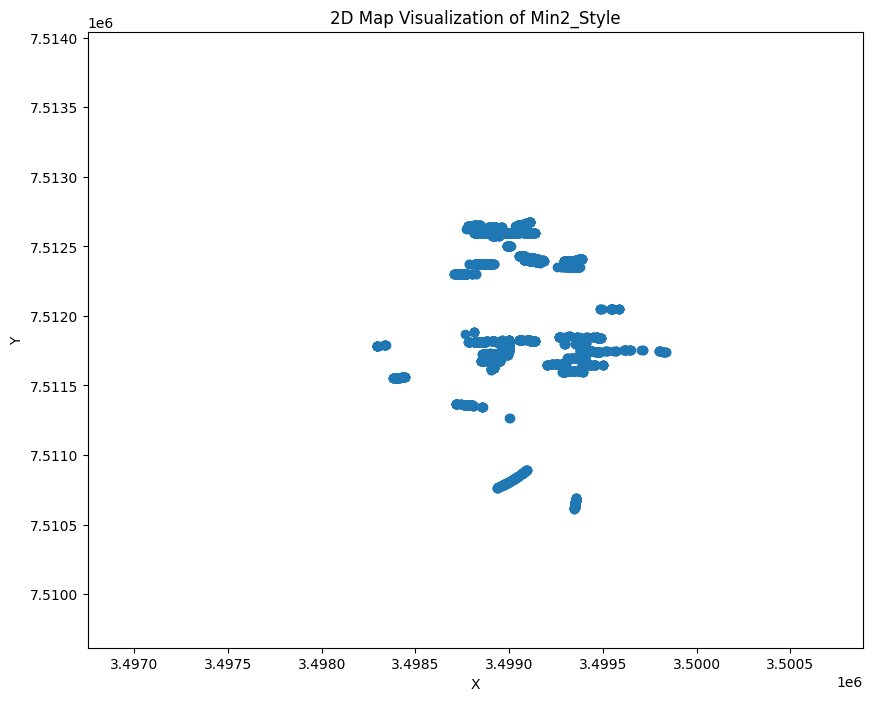

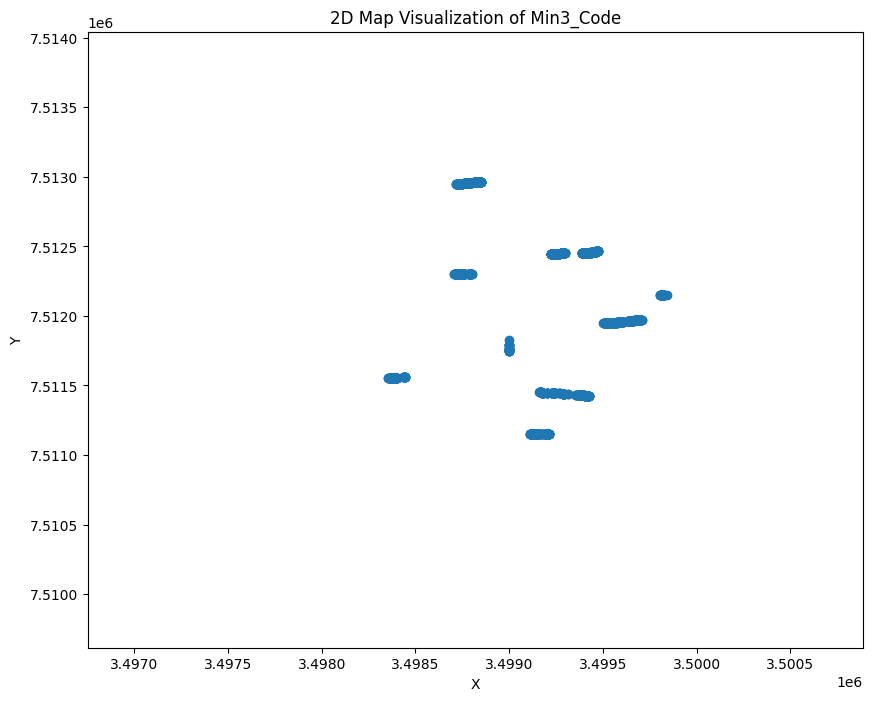

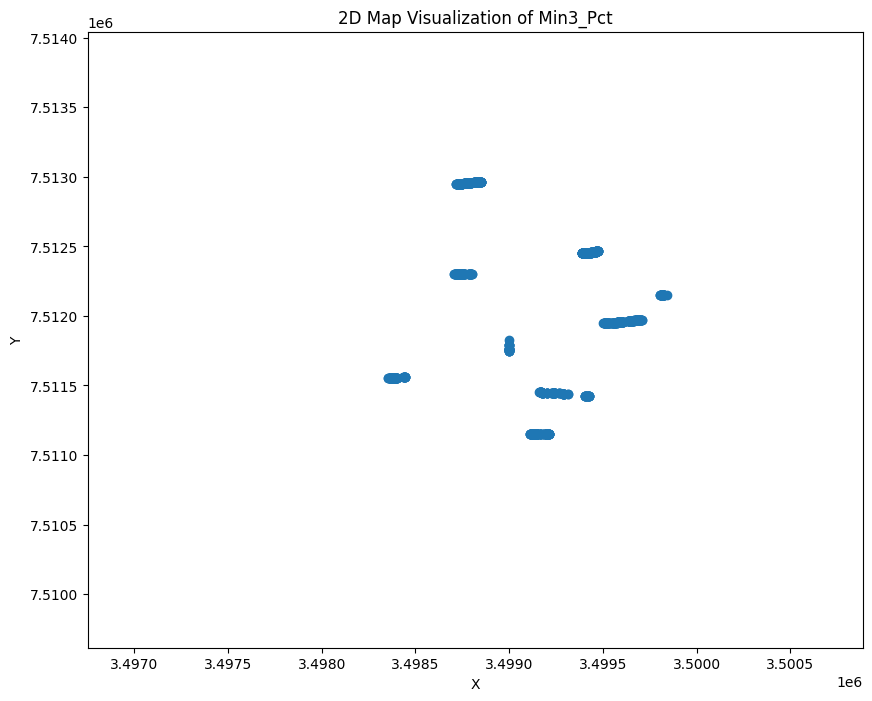

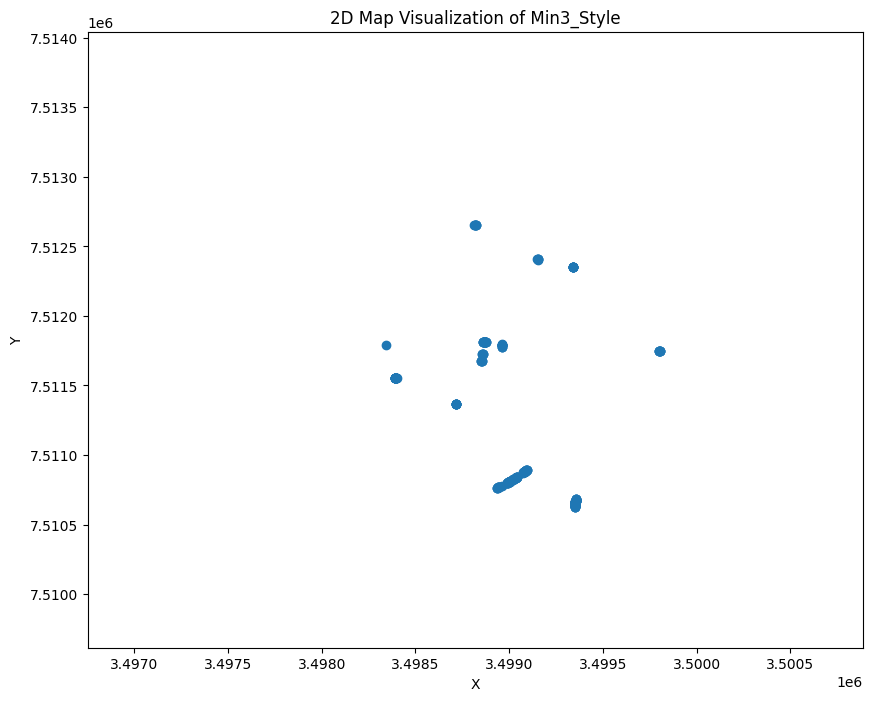

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Determine the widest range among all variables
widest_x_range = mineral_columns['X'].max() - mineral_columns['X'].min()
widest_y_range = mineral_columns['Y'].max() - mineral_columns['Y'].min()
widest_range = max(widest_x_range, widest_y_range)

# (e.g., columns 3 onwards)
selected_variables = mineral_columns.columns[3:]

# Create a separate plot for each variable with the same X and Y coordinate ranges
for variable in selected_variables:
    plt.figure(figsize=(10, 8))
    
    non_na_mask = mineral_columns[variable].notna()
    x = mineral_columns['X'][non_na_mask]
    y = mineral_columns['Y'][non_na_mask]
    values = mineral_columns[variable][non_na_mask]
    
    # Check if the variable contains non-numeric data
    if values.dtype.kind not in 'bifc':
        #print(f"Variable '{variable}' contains non-numeric data and will not have a colorbar.")
        plt.scatter(x, y)

    else:
        plt.scatter(x, y)
        #plt.scatter(x, y, c=values, cmap='viridis')
        #plt.colorbar(label=variable)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Map Visualization of {variable}')
    
    margin = 1000
    # Set the same X and Y coordinate ranges for all plots
    x_min = filtered_data['X'].min() - margin
    x_max = filtered_data['X'].max() + margin
    y_min = filtered_data['Y'].min() - margin
    y_max = filtered_data['Y'].max() + margin

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.show()


# 2. Sulphides

In [19]:
sulphide_columns = two_composite_filtered.iloc[:, list(range(4, 7)) + list(range(94, 103))]
sulphide_columns

,X,Y,Z,Sulph1_Code,Sulph1_Pct,Sulph1_Style,Sulph2_Code,Sulph2_Pct,Sulph2_Style,Sulph3_Code,Sulph3_Pct,Sulph3_Style
0,3498947.63,7511204.97,236.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3498948.84,7511204.92,234.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3498950.05,7511204.87,233.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3498951.26,7511204.82,231.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3498952.47,7511204.77,230.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
81197,3499086.36,7510950.00,89.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81198,3499087.71,7510950.00,88.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81199,3499089.07,7510950.00,86.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81200,3499090.42,7510950.00,85.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
sulphide_columns_no_na = sulphide_columns.dropna()
sulphide_columns_no_na

,X,Y,Z,Sulph1_Code,Sulph1_Pct,Sulph1_Style,Sulph2_Code,Sulph2_Pct,Sulph2_Style,Sulph3_Code,Sulph3_Pct,Sulph3_Style
3840,3498872.00,7512080.89,-144.31,PO,2.00,di,CP,1.00,di,PY,1.0,di
3841,3498872.72,7512080.80,-146.18,PO,2.00,di,CP,1.00,di,PY,1.0,di
3842,3498873.44,7512080.71,-148.04,PO,2.00,di,CP,1.00,di,PY,1.0,di
3843,3498874.17,7512080.62,-149.90,PO,2.00,di,CP,1.00,di,PY,1.0,di
3844,3498874.89,7512080.53,-151.77,PO,2.00,di,CP,1.00,di,PY,1.0,di
...,...,...,...,...,...,...,...,...,...,...,...,...
81059,3499349.51,7510630.04,105.79,PY,1.50,ve,PO,1.00,ve,CP,0.2,ve
81060,3499349.35,7510629.05,104.06,PY,1.69,ve,PO,0.81,ve,CP,0.2,ve
81061,3499349.19,7510628.06,102.33,PO,2.00,di,CP,0.50,di,PY,0.2,di
81062,3499349.02,7510627.07,100.60,PO,2.00,di,CP,0.50,di,PY,0.2,di


In [21]:
# Assuming 'mineral_columns' contains the relevant data with columns 5 to 7 and 56 to 65

# Create a boolean mask to check if X, Y, and Z are not NA
xyz_not_na = two_composite_filtered[['X', 'Y', 'Z']].notna().all(axis=1)

# Create a boolean mask to check if at least one of the other columns is not NA
other_not_na = sulphide_columns.iloc[:, 3:].notna().any(axis=1)

# Combine the two masks to filter rows where X, Y, Z are not NA and at least one other column is not NA
filtered_data = sulphide_columns[xyz_not_na & other_not_na]

# Now, 'filtered_data' contains the rows where X, Y, and Z are not NA, and at least one of the other columns is not NA


C:\Users\flea0265\AppData\Local\Temp\ipykernel_16152\395972361.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(selected_variables))
C:\Users\flea0265\AppData\Local\Temp\ipykernel_16152\395972361.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, label=variable)


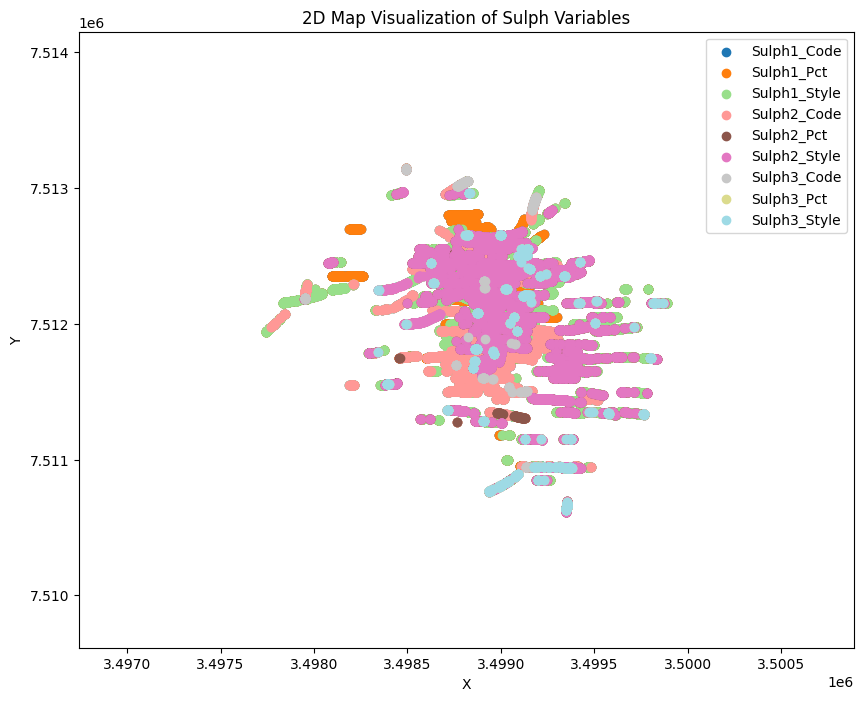

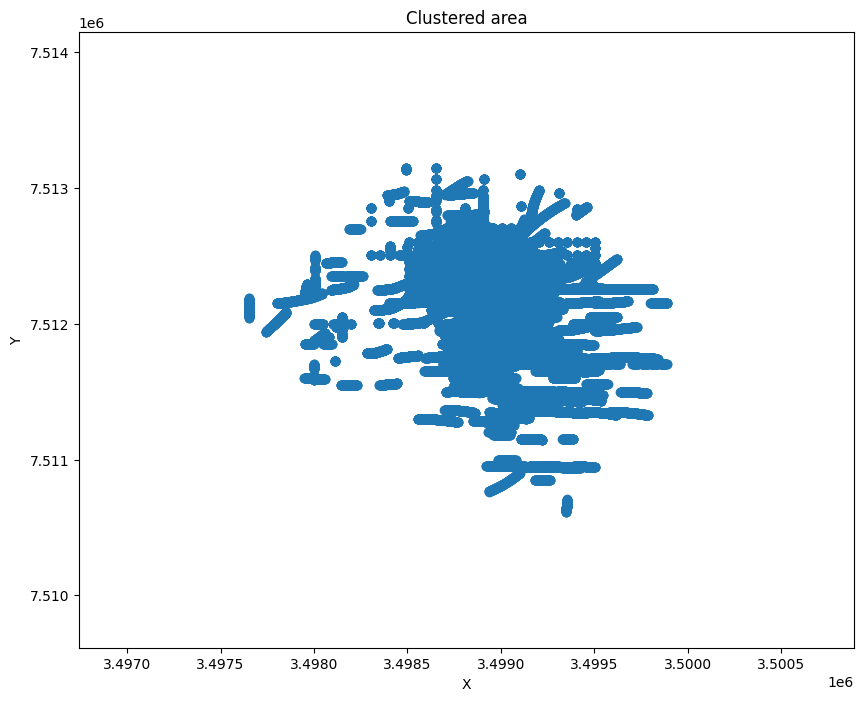

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_data' contains the filtered data where X, Y, and Z are not NA, and at least one other column is not NA
# 'sulphide_columns' contains the relevant data with columns 5 to 7 and 56 to 65
# Determine the widest range among all variables

# Define the variables you want to visualize (e.g., columns 3 onwards)
selected_variables = sulphide_columns.columns[3:]

# Create a color map with a unique color for each variable
cmap = plt.cm.get_cmap('tab20', len(selected_variables))

# Create a scatter plot for each variable with a unique color
plt.figure(figsize=(10, 8))

for i, variable in enumerate(selected_variables):
    non_na_mask = filtered_data[variable].notna()
    x = filtered_data['X'][non_na_mask]
    y = filtered_data['Y'][non_na_mask]
    values = filtered_data[variable][non_na_mask]
    
    # Use a unique color for each variable based on the color map
    color = cmap(i)
    
    plt.scatter(x, y, c=color, label=variable)

margin = 1000
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Map Visualization of Sulph Variables')
# Set the X and Y axis limits with a margin
x_min = filtered_data['X'].min() - margin
x_max = filtered_data['X'].max() + margin
y_min = filtered_data['Y'].min() - margin
y_max = filtered_data['Y'].max() + margin

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(x1, y1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustered area')
plt.show()


In [23]:
filtered_data['Sulph1_Code']

180      SU
181      SU
182      SU
183      SU
184      SU
         ..
81071    PO
81072    PO
81073    PO
81074    PO
81075    PO
Name: Sulph1_Code, Length: 37629, dtype: object

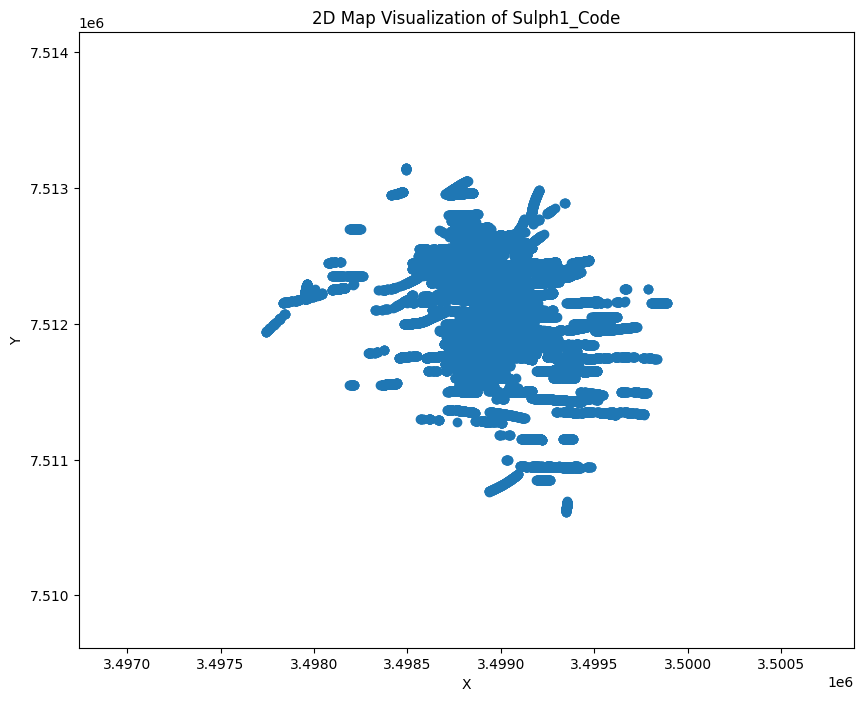

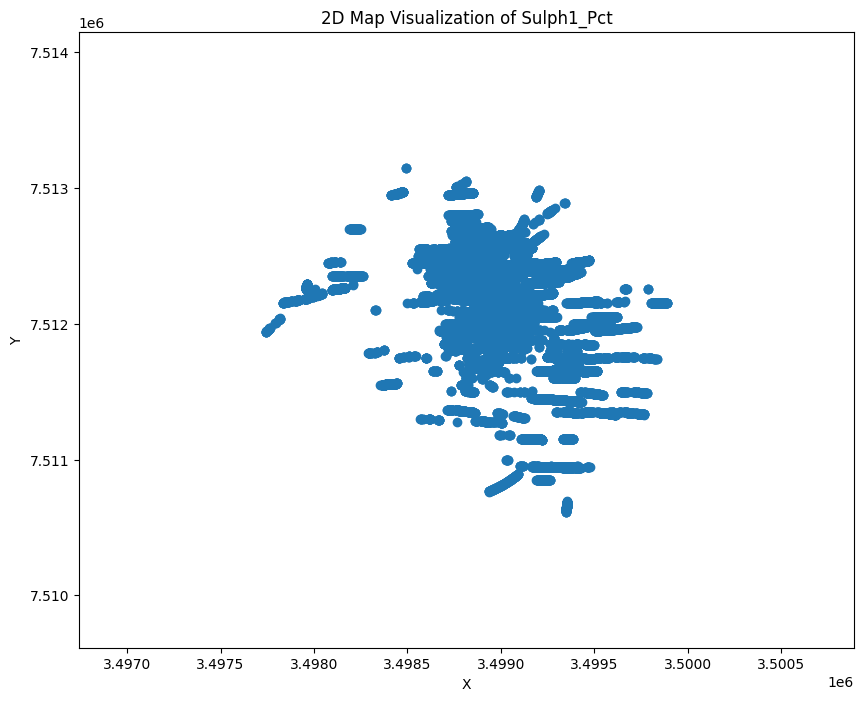

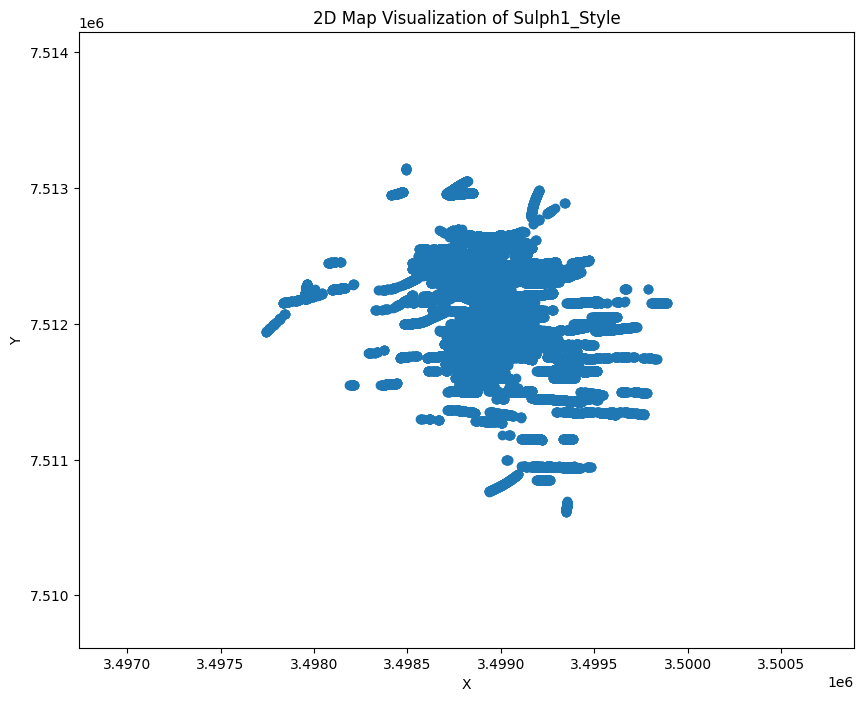

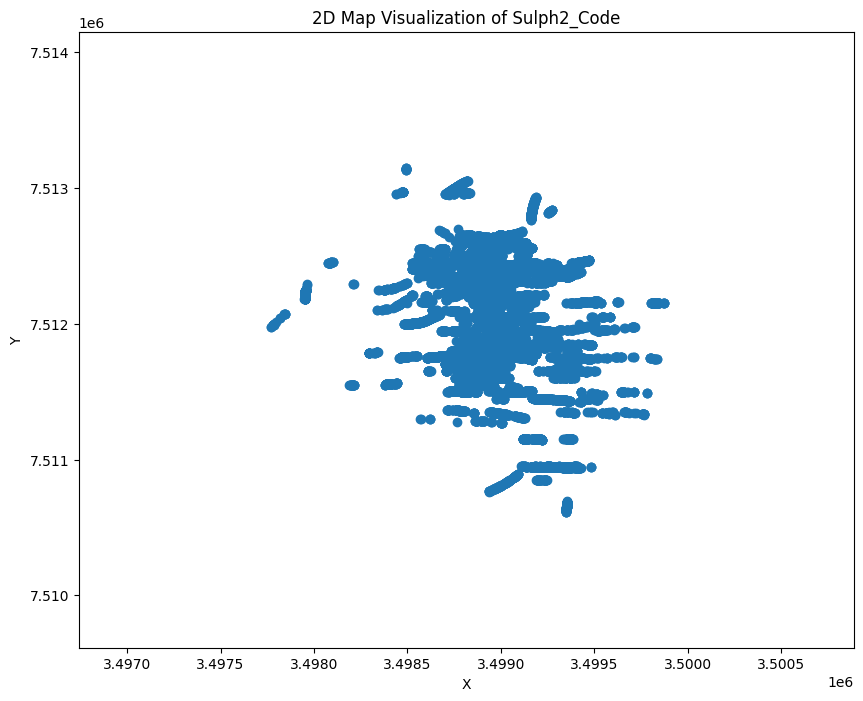

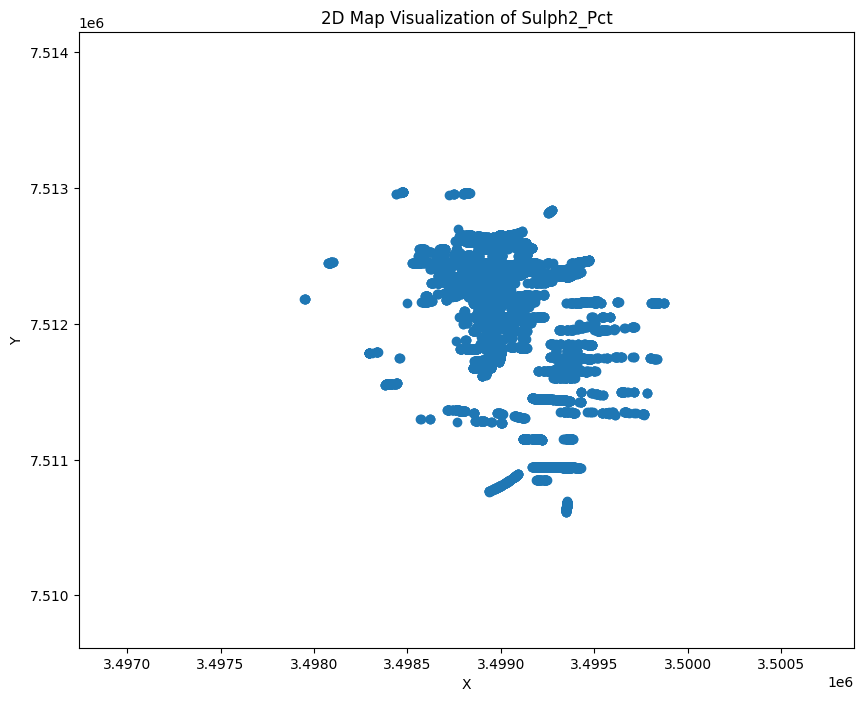

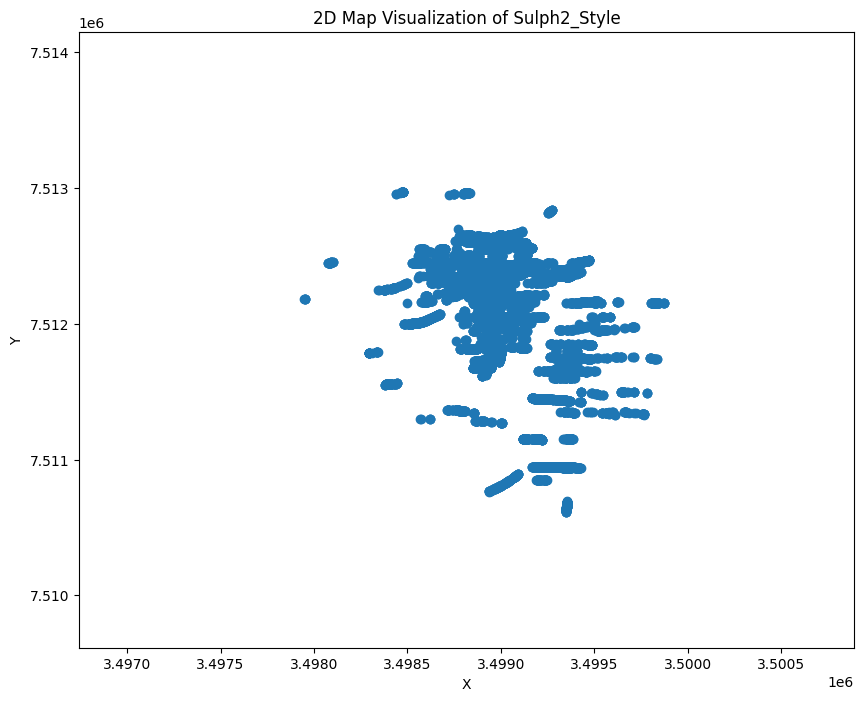

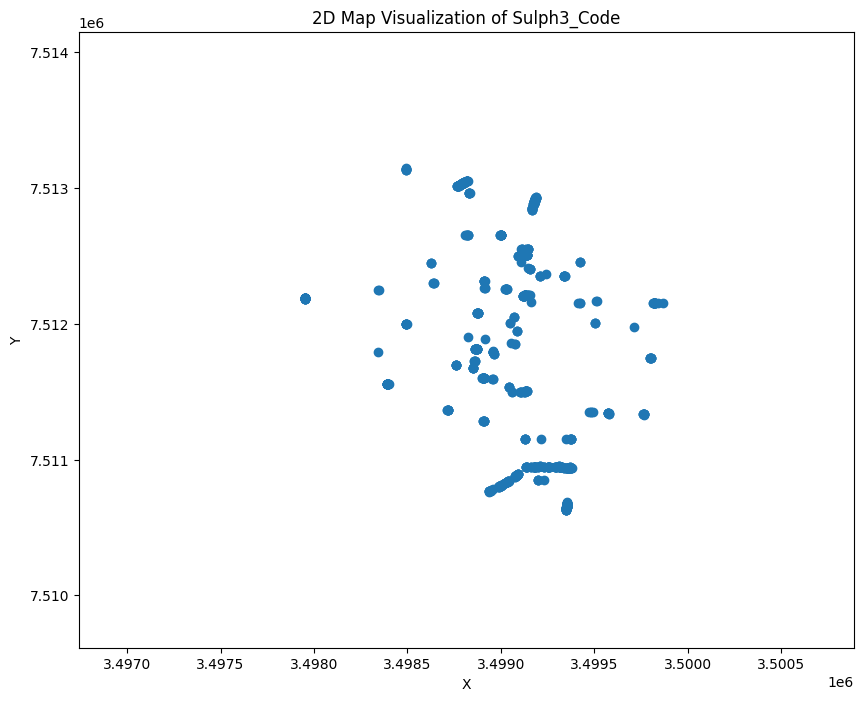

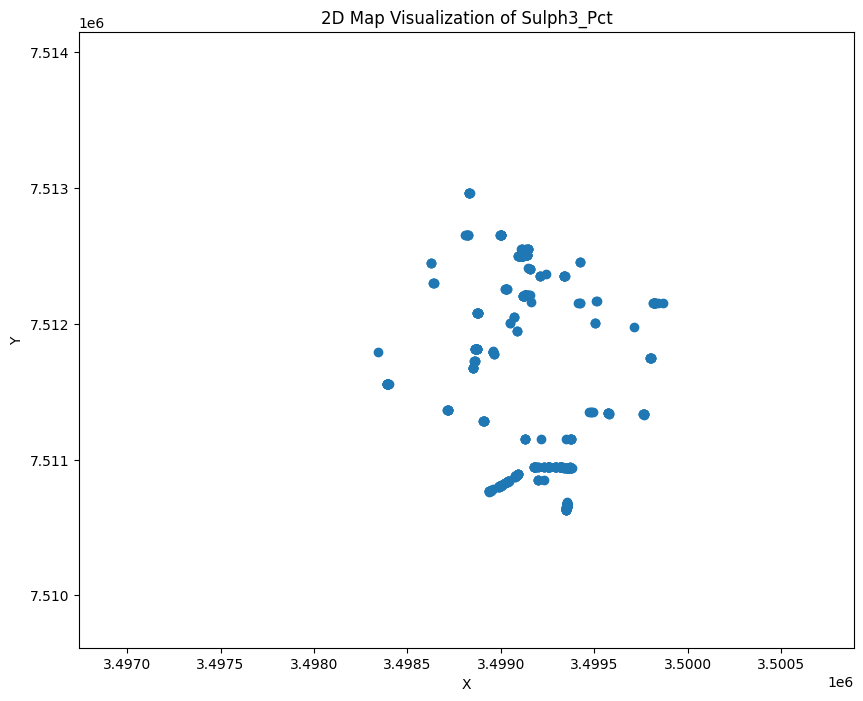

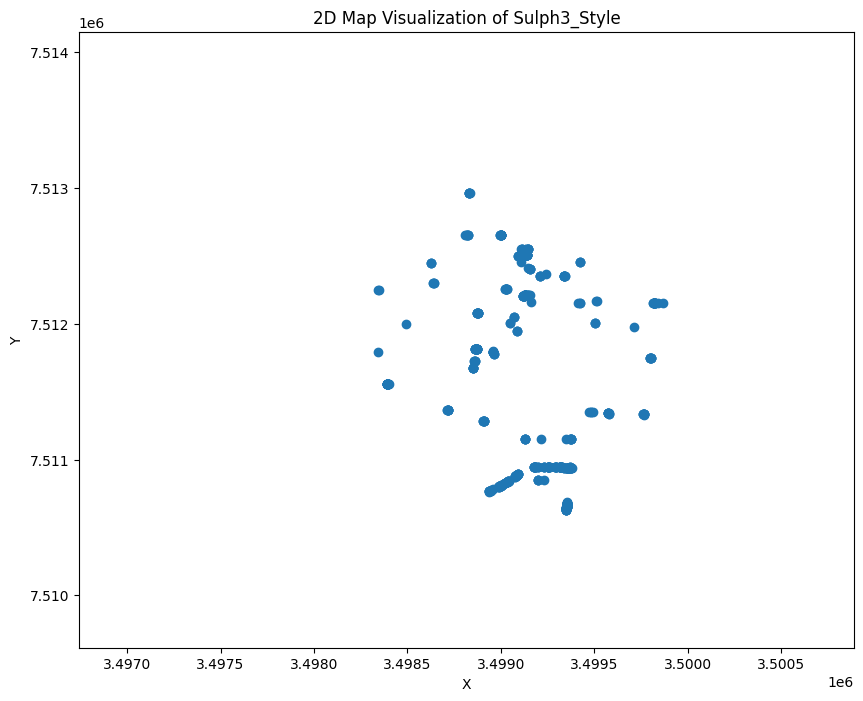

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Determine the widest range among all variables
widest_x_range = sulphide_columns['X'].max() - sulphide_columns['X'].min()
widest_y_range = sulphide_columns['Y'].max() - sulphide_columns['Y'].min()
widest_range = max(widest_x_range, widest_y_range)

# (e.g., columns 3 onwards)
selected_variables = sulphide_columns.columns[3:]

# Create a separate plot for each variable with the same X and Y coordinate ranges
for variable in selected_variables:
    plt.figure(figsize=(10, 8))
    
    non_na_mask = sulphide_columns[variable].notna()
    x = sulphide_columns['X'][non_na_mask]
    y = sulphide_columns['Y'][non_na_mask]
    values = sulphide_columns[variable][non_na_mask]
    
    # Check if the variable contains non-numeric data
    if values.dtype.kind not in 'bifc':
        #print(f"Variable '{variable}' contains non-numeric data and will not have a colorbar.")
        plt.scatter(x, y)

    else:
        plt.scatter(x, y)
        #plt.scatter(x, y, c=values, cmap='viridis')
        #plt.colorbar(label=variable)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Map Visualization of {variable}')
    
    # Set the same X and Y coordinate ranges for all plots
    margin = 1000
    x_min = filtered_data['X'].min() - margin
    x_max = filtered_data['X'].max() + margin
    y_min = filtered_data['Y'].min() - margin
    y_max = filtered_data['Y'].max() + margin

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()


In [31]:
two_composite_filtered['Sulph2_Code'].value_counts()

Sulph2_Code
CP    16629
PO      920
PY      235
MT        3
PE        2
Name: count, dtype: int64